In [2]:
import numpy as np 
import pandas as pd 
import string 
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data=pd.read_csv("C:/Users/NAMRATA/Downloads/reviews.csv")
data

,ID,Username,ProfileURL,Rate,RateText,Format,Title,Content,Helpful,Date,Thumbnails,Images,Video,Verified,ReviewURL
0,RVNKNRZDXNNJA,mani teja,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 8GB ...,Good mobile,\n Overall good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/RVNK...
1,R2KS1QQ6XHOG2H,Adarsh p,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Awesome phone but needs some improvements,\n ProsGood audio and vedio quality26mins to ...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2KS...
2,R24CXVNLHRGMMH,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Value for money,\n Overall mind blowing\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R24C...
3,R15NVH8NC7FD1X,Suraj thakur,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,All rounder phone....,\n Beast\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R15N...
4,R30RO56GL2NJSB,amit kumar,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 8GB ...,Must buy this.,\n Nyc phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R30R...
5,R1TBNMSNRU3R7N,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Best smartphone with SD888,"\n SD888 and EIS,OIS\n",NaN,Reviewed in India on 12 July 2021,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R1TB...
6,R32OG1ODNCFFJ5,Anand Kumar T,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Overall a good spec heavy mobile but lags in s...,\n I have been using this mobile for almost 2...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R32O...
7,R23ERV5J49KI9R,Jayraj Patel,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Flagship killer,\n Good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,NaN,https://www.amazon.in/gp/customer-reviews/R23E...
8,REQ1V1GQZU339,MUTHASWIN RM,https://www.amazon.in/gp/profile/amzn1.account...,4,4.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Awesome mobile for this price range,\n Fingerprint reader is quick and good. Batt...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/REQ1...
9,R2S63RPDGDZNGI,Hemanth,https://www.amazon.in/gp/profile/amzn1.account...,5,5.0 out of 5 stars,Colour: Legendary Track DesignStyle name: 12GB...,Overall performance is of the value,\n Quite comfortable in hand but heat's up ra...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2S6...


Number of Words

In [4]:
#Number of Words in single review
data['word_count'] = data['RateText'].apply(lambda x: len(str(x).split(" ")))
data[['RateText','word_count']].head()

,RateText,word_count
0,4.0 out of 5 stars,5
1,5.0 out of 5 stars,5
2,5.0 out of 5 stars,5
3,5.0 out of 5 stars,5
4,5.0 out of 5 stars,5


In [5]:
#Number of characters in single review including spaces
data['char_count'] = data['RateText'].str.len() 
data[['RateText','char_count']].head()

,RateText,char_count
0,4.0 out of 5 stars,18
1,5.0 out of 5 stars,18
2,5.0 out of 5 stars,18
3,5.0 out of 5 stars,18
4,5.0 out of 5 stars,18


Number of Stopwords

In [7]:
stop = stopwords.words('english')

data['stopwords'] = data['RateText'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['RateText','stopwords']].head()

,RateText,stopwords
0,4.0 out of 5 stars,2
1,5.0 out of 5 stars,2
2,5.0 out of 5 stars,2
3,5.0 out of 5 stars,2
4,5.0 out of 5 stars,2


In [8]:
# Total no.of stopwords in given dataset

In [9]:
data['stopwords'].sum()

100

Converting to lower case

In [10]:
data['RateText'] = data['RateText'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['RateText'].head()

0    4.0 out of 5 stars
1    5.0 out of 5 stars
2    5.0 out of 5 stars
3    5.0 out of 5 stars
4    5.0 out of 5 stars
Name: RateText, dtype: object

In [11]:
data['RateText'] = data['RateText'].str.replace('[^\w\s]','')
data['RateText'].head()

0    40 out of 5 stars
1    50 out of 5 stars
2    50 out of 5 stars
3    50 out of 5 stars
4    50 out of 5 stars
Name: RateText, dtype: object

Removing of Stop Words

In [12]:
stop = stopwords.words('english')
data['RateText'] = data['RateText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['RateText'].head()

0    40 5 stars
1    50 5 stars
2    50 5 stars
3    50 5 stars
4    50 5 stars
Name: RateText, dtype: object

Tokenization

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NAMRATA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
review=np.array(data['RateText'])
s=str(review)
s

"['40 5 stars' '50 5 stars' '50 5 stars' '50 5 stars' '50 5 stars'\n '40 5 stars' '50 5 stars' '50 5 stars' '40 5 stars' '50 5 stars'\n '40 5 stars' '50 5 stars' '50 5 stars' '50 5 stars' '20 5 stars'\n '50 5 stars' '50 5 stars' '50 5 stars' '10 5 stars' '50 5 stars'\n '50 5 stars' '50 5 stars' '50 5 stars' '50 5 stars' '50 5 stars'\n '40 5 stars' '50 5 stars' '50 5 stars' '50 5 stars' '40 5 stars'\n '10 5 stars' '50 5 stars' '50 5 stars' '40 5 stars' '50 5 stars'\n '50 5 stars' '50 5 stars' '50 5 stars' '50 5 stars' '50 5 stars'\n '50 5 stars' '50 5 stars' '50 5 stars' '50 5 stars' '50 5 stars'\n '10 5 stars' '40 5 stars' '40 5 stars' '50 5 stars' '50 5 stars']"

In [16]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(s)
print(text_tokens)

['[', "'40", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', "stars'", "'40", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'40", '5', 'stars', "'", "'50", '5', "stars'", "'40", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'20", '5', "stars'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'10", '5', 'stars', "'", "'50", '5', "stars'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', "stars'", "'40", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'40", '5', "stars'", "'10", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'40", '5', 'stars', "'", "'50", '5', "stars'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '5', 'stars', "'", "'50", '

Stemming

In [17]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['RateText'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    40 5 star
1    50 5 star
2    50 5 star
3    50 5 star
4    50 5 star
Name: RateText, dtype: object

Lemmatization¶

In [18]:
data['RateText'] = data['RateText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['RateText'].head()

0    40 5 star
1    50 5 star
2    50 5 star
3    50 5 star
4    50 5 star
Name: RateText, dtype: object

Sentiment Analysis

In [19]:
data['sentiment_polarity'] = data['RateText'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['RateText','sentiment_polarity']].head()

,RateText,sentiment_polarity
0,40 5 star,0.0
1,50 5 star,0.0
2,50 5 star,0.0
3,50 5 star,0.0
4,50 5 star,0.0


Sentiment

In [20]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
data ['sentiment'] = data  ['sentiment_polarity'].apply(getAnalysis )
data[['RateText','sentiment','sentiment_polarity']]

,RateText,sentiment,sentiment_polarity
0,40 5 star,Neutral,0.0
1,50 5 star,Neutral,0.0
2,50 5 star,Neutral,0.0
3,50 5 star,Neutral,0.0
4,50 5 star,Neutral,0.0
5,40 5 star,Neutral,0.0
6,50 5 star,Neutral,0.0
7,50 5 star,Neutral,0.0
8,40 5 star,Neutral,0.0
9,50 5 star,Neutral,0.0


In [ ]:
# No.of Negative,Positive and Neutral Tweets in our given data

In [21]:
count=data['sentiment'].value_counts()
count

Neutral    50
Name: sentiment, dtype: int64

In [23]:
data

,ID,Username,ProfileURL,Rate,RateText,Format,Title,Content,Helpful,Date,Thumbnails,Images,Video,Verified,ReviewURL,word_count,char_count,stopwords,sentiment_polarity,sentiment
0,RVNKNRZDXNNJA,mani teja,https://www.amazon.in/gp/profile/amzn1.account...,4,40 5 star,Colour: Legendary Track DesignStyle name: 8GB ...,Good mobile,\n Overall good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/RVNK...,5,18,2,0.0,Neutral
1,R2KS1QQ6XHOG2H,Adarsh p,https://www.amazon.in/gp/profile/amzn1.account...,5,50 5 star,Colour: Legendary Track DesignStyle name: 12GB...,Awesome phone but needs some improvements,\n ProsGood audio and vedio quality26mins to ...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2KS...,5,18,2,0.0,Neutral
2,R24CXVNLHRGMMH,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,5,50 5 star,Colour: Legendary Track DesignStyle name: 12GB...,Value for money,\n Overall mind blowing\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R24C...,5,18,2,0.0,Neutral
3,R15NVH8NC7FD1X,Suraj thakur,https://www.amazon.in/gp/profile/amzn1.account...,5,50 5 star,Colour: Legendary Track DesignStyle name: 12GB...,All rounder phone....,\n Beast\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R15N...,5,18,2,0.0,Neutral
4,R30RO56GL2NJSB,amit kumar,https://www.amazon.in/gp/profile/amzn1.account...,5,50 5 star,Colour: Legendary Track DesignStyle name: 8GB ...,Must buy this.,\n Nyc phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R30R...,5,18,2,0.0,Neutral
5,R1TBNMSNRU3R7N,Amazon Customer,https://www.amazon.in/gp/profile/amzn1.account...,4,40 5 star,Colour: Legendary Track DesignStyle name: 12GB...,Best smartphone with SD888,"\n SD888 and EIS,OIS\n",NaN,Reviewed in India on 12 July 2021,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R1TB...,5,18,2,0.0,Neutral
6,R32OG1ODNCFFJ5,Anand Kumar T,https://www.amazon.in/gp/profile/amzn1.account...,5,50 5 star,Colour: Legendary Track DesignStyle name: 12GB...,Overall a good spec heavy mobile but lags in s...,\n I have been using this mobile for almost 2...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R32O...,5,18,2,0.0,Neutral
7,R23ERV5J49KI9R,Jayraj Patel,https://www.amazon.in/gp/profile/amzn1.account...,5,50 5 star,Colour: Legendary Track DesignStyle name: 12GB...,Flagship killer,\n Good phone\n,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,NaN,https://www.amazon.in/gp/customer-reviews/R23E...,5,18,2,0.0,Neutral
8,REQ1V1GQZU339,MUTHASWIN RM,https://www.amazon.in/gp/profile/amzn1.account...,4,40 5 star,Colour: Legendary Track DesignStyle name: 12GB...,Awesome mobile for this price range,\n Fingerprint reader is quick and good. Batt...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/REQ1...,5,18,2,0.0,Neutral
9,R2S63RPDGDZNGI,Hemanth,https://www.amazon.in/gp/profile/amzn1.account...,5,50 5 star,Colour: Legendary Track DesignStyle name: 12GB...,Overall performance is of the value,\n Quite comfortable in hand but heat's up ra...,NaN,Reviewed in India on 12 July 2021,NaN,NaN,NaN,Verified Purchase,https://www.amazon.in/gp/customer-reviews/R2S6...,5,18,2,0.0,Neutral


<BarContainer object of 1 artists>

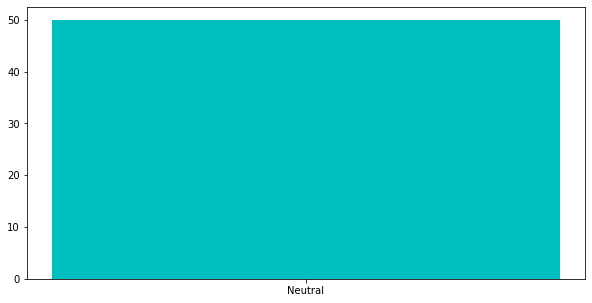

In [24]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10,5))
count=[50]
senti=['Neutral']
plt.bar(senti,count,color='c')

Word Cloud for our tweets

In [27]:
# Joining the list into one string/text
text = ' '.join(data['RateText'])
text

'40 5 star 50 5 star 50 5 star 50 5 star 50 5 star 40 5 star 50 5 star 50 5 star 40 5 star 50 5 star 40 5 star 50 5 star 50 5 star 50 5 star 20 5 star 50 5 star 50 5 star 50 5 star 10 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 40 5 star 50 5 star 50 5 star 50 5 star 40 5 star 10 5 star 50 5 star 50 5 star 40 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 50 5 star 10 5 star 40 5 star 40 5 star 50 5 star 50 5 star'

In [28]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

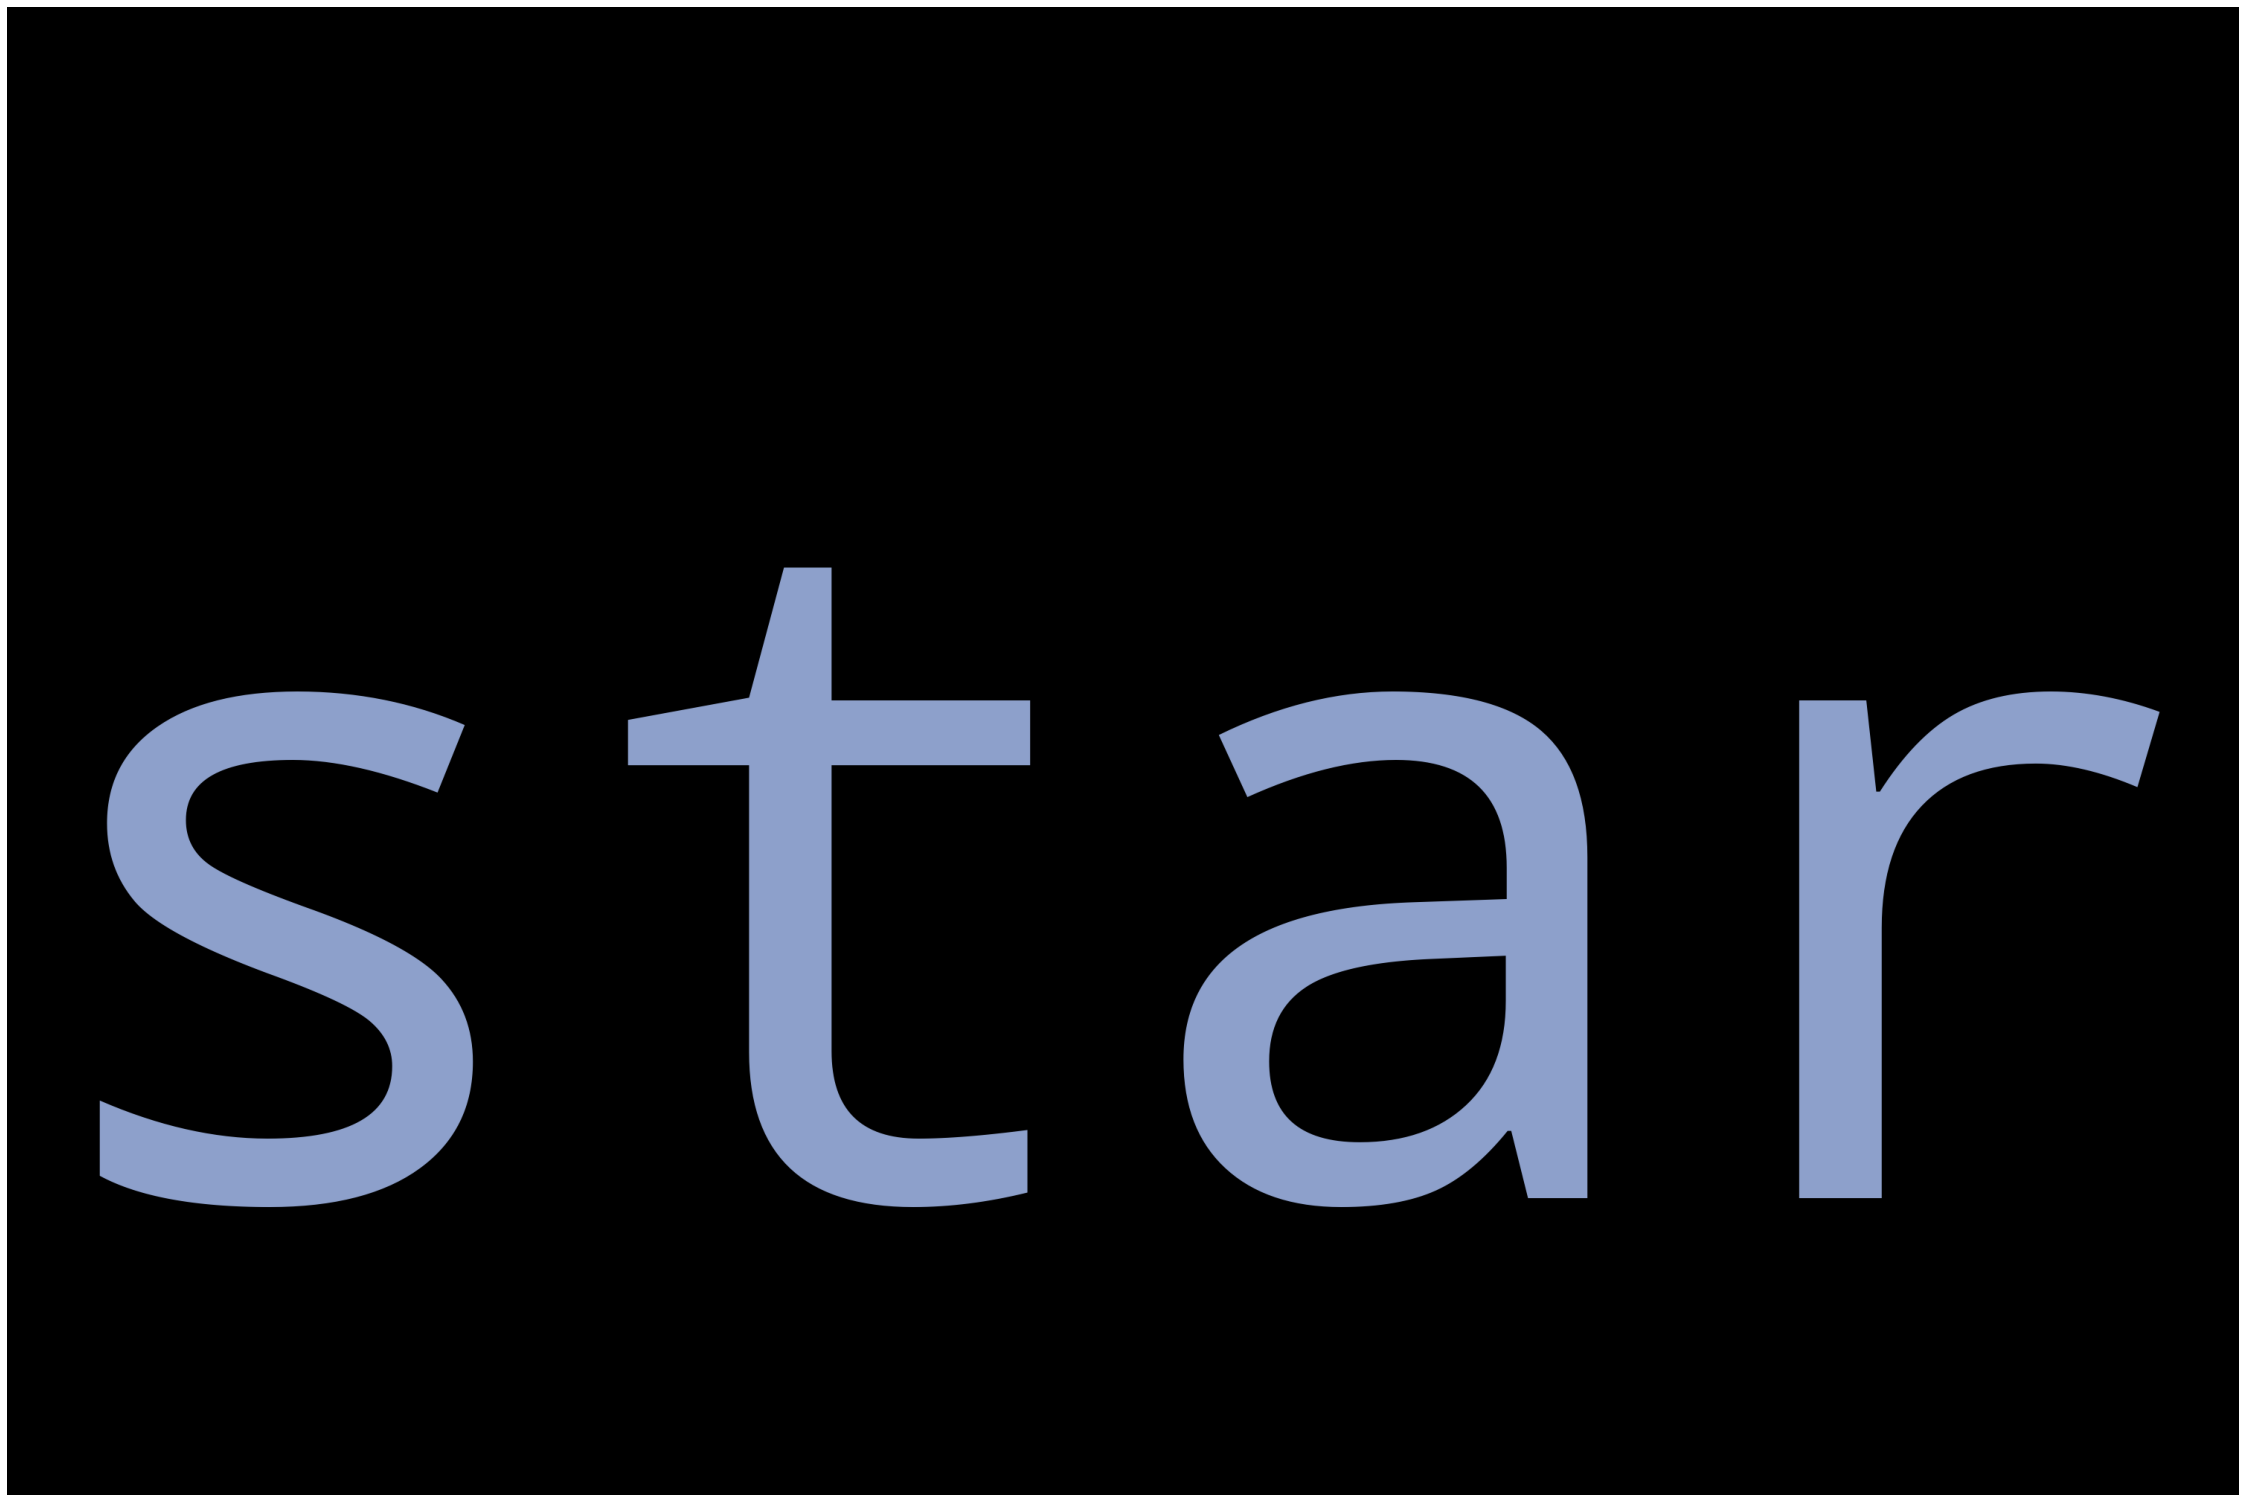

In [29]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)